In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import numpy as np

df = pd.read_excel("data_last.xlsx")

In [3]:
df.describe()

,Unnamed: 0,Номер,Дата,Сумма,Работа,Детали
count,19321.000000,19321.000000,19217,19321.000000,19321.000000,19321.000000
mean,766.400290,26360.051705,2017-03-17 18:18:49.624811520,2511.996791,2067.810414,444.186378
min,0.000000,16598.000000,2012-04-05 00:00:00,0.000000,0.000000,0.000000
25%,59.000000,21419.000000,2014-06-09 00:00:00,1200.000000,900.000000,0.000000
50%,249.000000,26276.000000,2016-09-20 00:00:00,2200.000000,1800.000000,300.000000
75%,1015.000000,31261.000000,2019-09-30 00:00:00,3500.000000,2900.000000,500.000000
max,4456.000000,36424.000000,2023-11-21 00:00:00,35000.000000,35000.000000,15000.000000
std,1085.530072,5707.999526,NaN,2271.089513,1845.761208,724.301377


In [5]:
malfunction = df['Неисправность'].value_counts()
malfunction

Неисправность
не включается                           5926
нет изображения                          808
не читает диски                          475
нет звука                                455
ЛПМ                                      366
                                        ... 
не включается, от кабеля включается        1
останавливается начав раскручиваться       1
неисправны регуляторы                      1
упал, не раскручивает диск                 1
сломан штеккер                             1
Name: count, Length: 4948, dtype: int64

In [1]:
malfunction.describe()

NameError: name 'malfunction' is not defined

C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Кол-во заказов по мастерам')

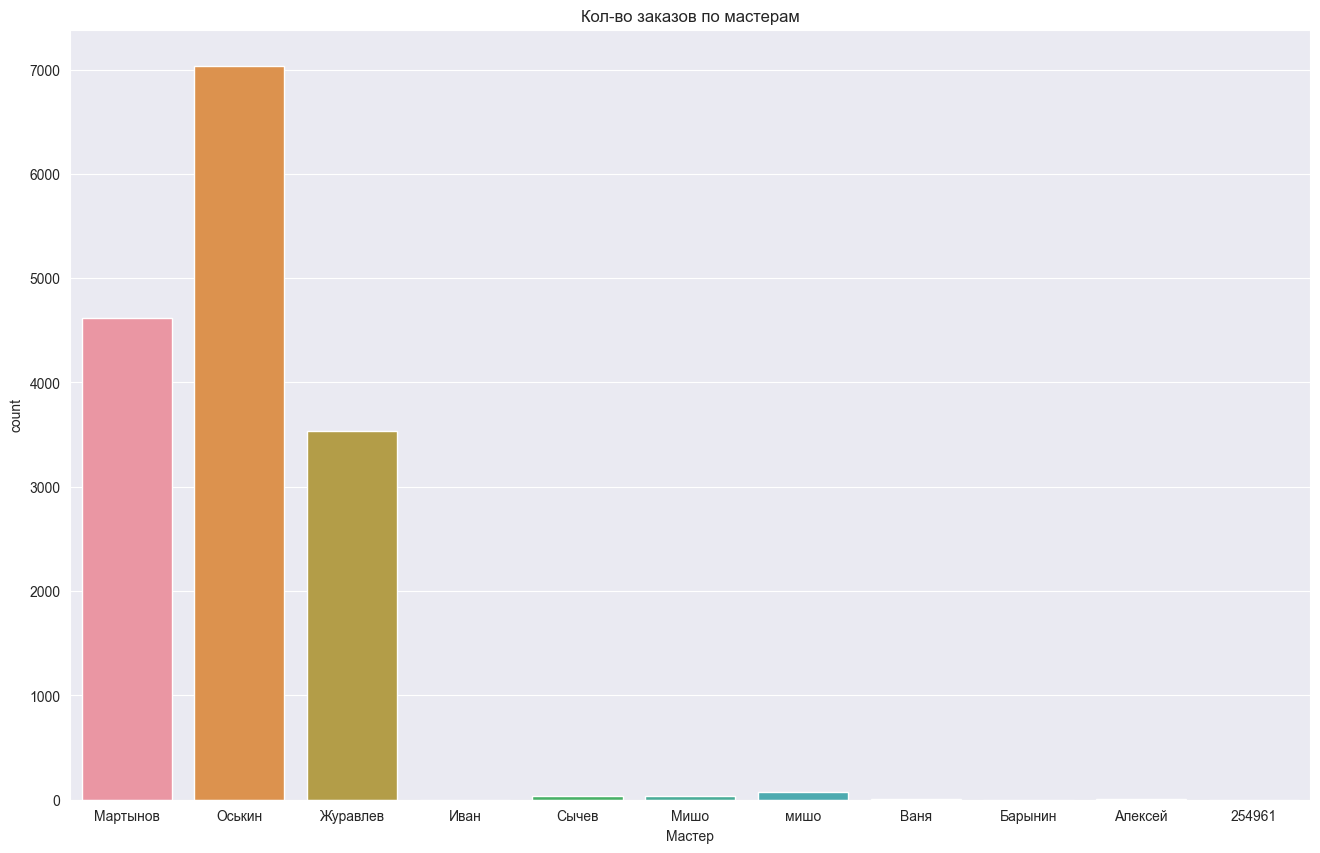

In [5]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.countplot(data=df, x = df['Мастер']).set_title("Кол-во заказов по мастерам")

C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Дата', ylabel='Сумма'>

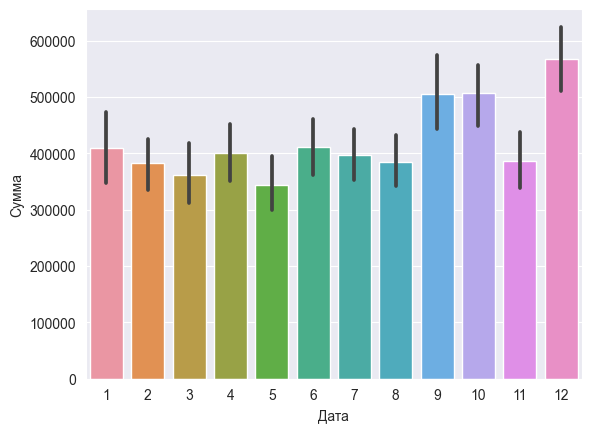

In [6]:
filtered_df = df.loc[(df['Дата'] >= '2015-01-01')
                       & (df['Дата'] < '2015-12-31')]
# filtered_df.tail()
sns.barplot(x=filtered_df['Дата'].dt.month, y="Сумма", data=filtered_df, estimator=sum)

C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Кол-во заказов по виду техники')

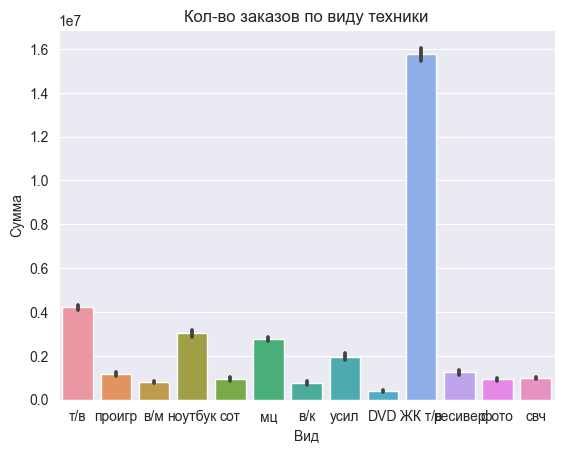

In [8]:
counts = df['Вид'].value_counts()
filtered_values = counts[counts > 250].index.tolist()
filtered_df = df[df['Вид'].isin(filtered_values)]

sns.barplot(data=filtered_df, x = filtered_df['Вид'], y = filtered_df["Сумма"], estimator=sum).set_title("Кол-во заказов по виду техники")